In [1]:
cd ..

/Users/A.VILLAMANRIQUE/repositories/web-file


In [2]:
import pandas as pd
from configparser import ConfigParser
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

from scripts import CONF_INI
from scraper.twitter import Twitter
from preparation.data_manager import DataManager
from processing.visualization import Visual
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

# 1. Read Tweets Profile

In [3]:
cfg = ConfigParser()
cfg.read(CONF_INI)
data_dir = cfg["PATHS"]["data_clean"]
manager = DataManager()
profiles = manager.read_profiles(data_dir)

# 2. WorldCloud

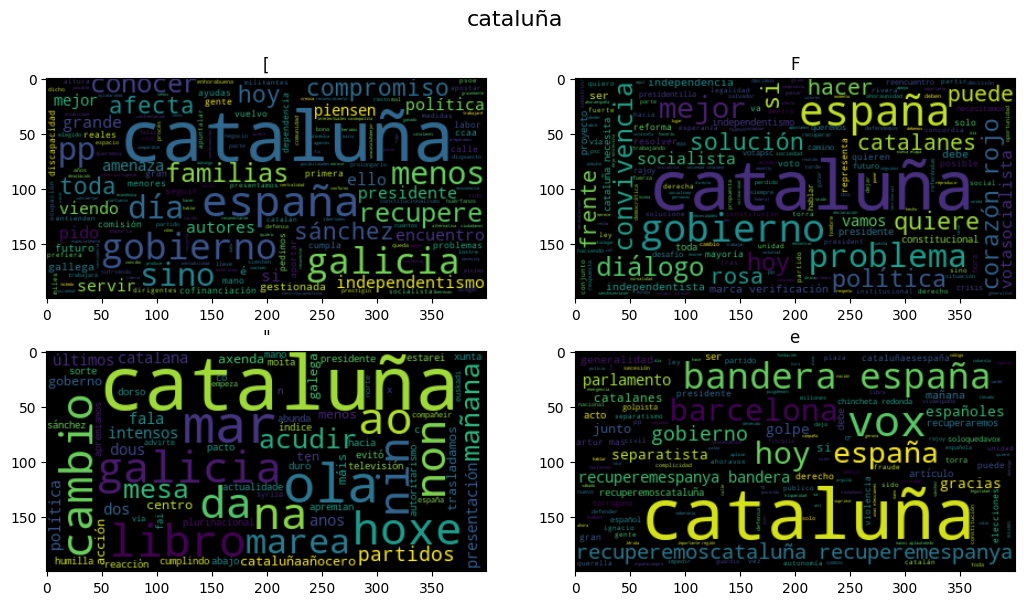

In [4]:
QUERY = "cataluña"
profiles_kw = manager.collect_keyword(profiles, QUERY)
Visual.create_wordcloud(profiles_kw, manager.names, QUERY)

# 3. Wordnet

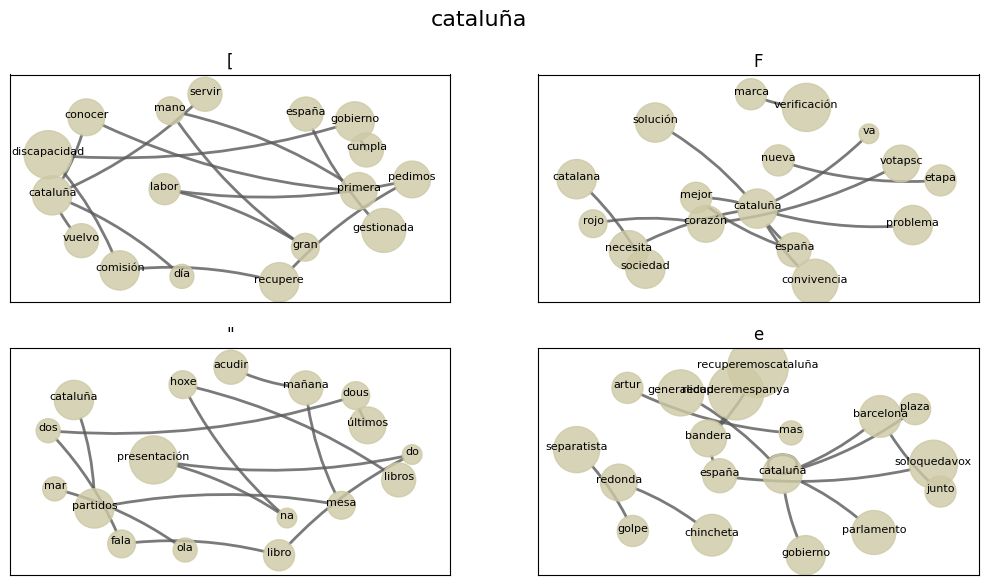

In [5]:
Visual.word_net(profiles_kw, manager.names, 15, QUERY)

# 4. Question and Answering

In [3]:
from modeling.extractive_qa import ExtractiveQA

model_path = "minilm-uncased-squad2"
qa_model = ExtractiveQA(model_path)

ONNX opset version set to: 12
Loading pipeline (model: minilm-uncased-squad2, tokenizer: PreTrainedTokenizerFast(name_or_path='minilm-uncased-squad2', vocab_size=30522, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}))
Using framework PyTorch: 1.10.2
Found input input_ids with shape: {0: 'batch', 1: 'sequence'}
Found input token_type_ids with shape: {0: 'batch', 1: 'sequence'}
Found input attention_mask with shape: {0: 'batch', 1: 'sequence'}
Found output output_0 with shape: {0: 'batch', 1: 'sequence'}
Found output output_1 with shape: {0: 'batch', 1: 'sequence'}
Ensuring inputs are in correct order
position_ids is not present in the generated input list.
Generated inputs order: ['input_ids', 'attention_mask', 'token_type_ids']


In [5]:
profile = pd.read_csv("data/processed/translated/sanchezcastejon.csv", sep=";")
answer = qa_model.answer_from_profile(profile, "why rich people should pay more?", "economy")
answer

100%|██████████| 237/237 [00:22<00:00, 10.48it/s]


,date,tweet,answer
72,2022-11-26 13:40:02+00:00,"Gracias, @antoniocostapm, por estar presente en el #26CongresoIS. La solución ibérica representa el compromiso de lo público por poner la economía al servicio de la gente. 🌹Juntos por la inclusión, la igualdad y la justicia fiscal. #ElSocialismoQueViene https://t.co/rk9pBa22aS",tax justice
2339,2020-11-13 13:51:37+00:00,"Con los #PGE2021 respondemos a la mayor pandemia del siglo con la mayor inversión social de nuestra historia. Navarra recibirá 161 millones de euros, en unos Presupuestos destinados a impulsar la recuperación del país, transformando la economía. No hay tiempo que perder. https://t.co/DRyBehyPLN",boost the country's recovery
3092,2020-02-22 08:24:29+00:00,"Debemos avanzar hacia una fiscalidad más justa, redistributiva y que se adecúe a los nuevos modelos de economía digital. España es un país moderno y no puede estar anclado en sistemas tributarios del siglo pasado. Urge actuar rápido, actuar juntos. Tribuna de @NadiaCalvino 👇 https://t.co/u50XDpaJku",adapts to the new models of the digital economy
3699,2019-10-03 19:06:48+00:00,"Si hay enfriamiento de la economía, el Gobierno de España actuará con rigor y con sensibilidad social, repartiendo justamente y haciendo que quienes más tienen, más contribuyan a mantener lo que es de todos y todas, nuestro Estado del Bienestar. #AhoraEspaña https://t.co/RcsfDDoAE8",maintaining what belongs to everyone
4840,2019-01-12 09:06:30+00:00,"Los #PGE2019 apuestan por la modernización de nuestra economía, la reconstrucción del Estado del Bienestar y la reducción del déficit público, con un objetivo central: las personas, especialmente en las más vulnerables. Unos presupuestos para una #España mejor para todos y todas. https://t.co/V9ipMOg9nm",some budgets for a better # spain for everyone
5951,2018-03-12 17:54:07+00:00,La recuperación económica no llega a los trabajadores. Necesitamos un Pacto de Rentas para recuperar el peso de los salarios en la economía. @CincoDiascom https://t.co/8FVYIXEaxY,we need an income pact to recover the weight of wages in the economy
6467,2017-11-08 17:59:48+00:00,¿Cómo es posible que el salario medio baje por primera vez en 10 años si la #economía está creciendo? ¿De qué recuperación hablamos? Urge un pacto de rentas que fije subidas salariales y un reparto justo de la riqueza. https://t.co/3GjjV4Ogfo,an income pact is urgently needed that sets wage increases and a fair distribution of wealth
8938,2016-04-19 19:08:09+00:00,"Es urgente la regeneración democrática, combatir la desigualdad, mejorar nuestra economía y crear oportunidades para millones de españoles.",inequality
11336,2015-02-27 18:19:49+00:00,"Lula sacó a #Brasil de una grave situación económica, construyó una clase media y apostó por una economía justa @LulapeloBrasil @inst_lula",fair economy
14580,2014-04-20 14:29:25+00:00,"@javiermartin540 hola Javier, me gusta. Willy Brandt y Palme ya hablaron de la exigencia de democratizar la economía: acabar con monopolios",end monopolies


In [6]:
profile = pd.read_csv("data/processed/translated/sanchezcastejon.csv", sep=";")
answer = qa_model.answer_from_profile_fast(profile, "what do you want", "energy")
answer

  0%|          | 0/186 [00:00<?, ?it/s]

: 

: 